In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [55]:
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [56]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [57]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [58]:
df.shape

(215, 15)

In [59]:
df['salary']=df['salary'].fillna(df['salary'].mode()[0])
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<BarContainer object of 215 artists>

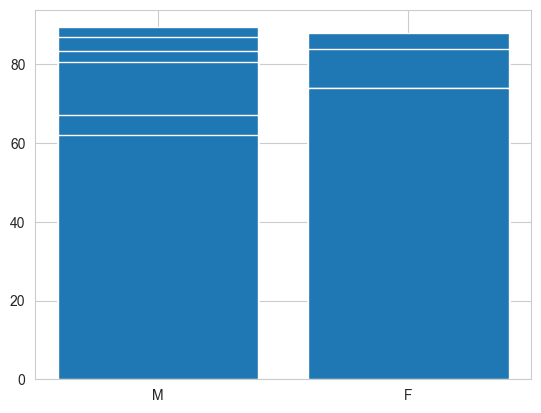

In [60]:
plt.bar(df['gender'],df['ssc_p'] )


<BarContainer object of 215 artists>

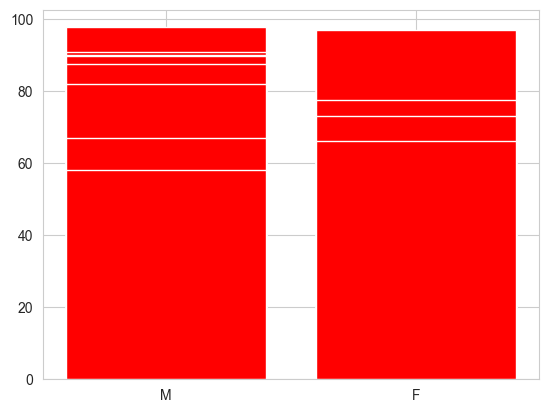

In [61]:
plt.bar(df['gender'],df['hsc_p'], color='red' )

In [62]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<BarContainer object of 215 artists>

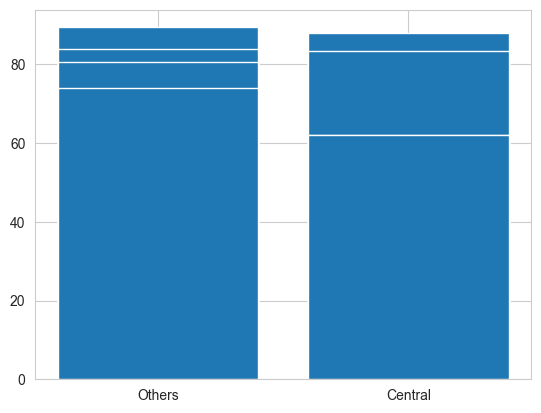

In [63]:
plt.bar(df['ssc_b'], df['ssc_p'])

<BarContainer object of 215 artists>

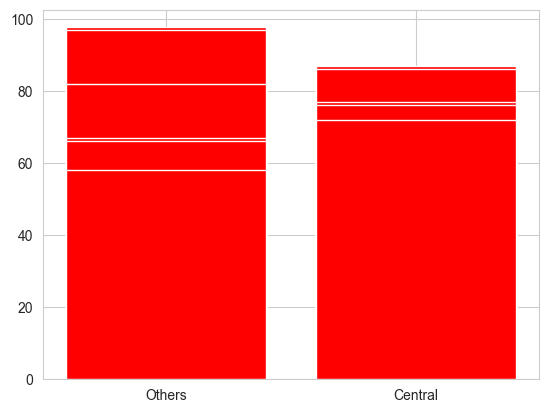

In [64]:
plt.bar(df['hsc_b'], df['hsc_p'], color='red')

In [65]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

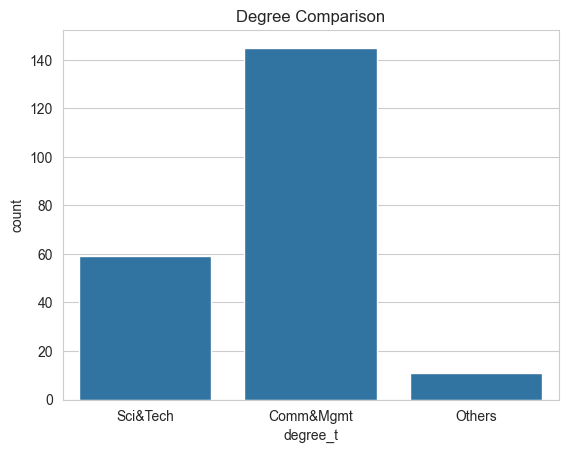

In [66]:
sns.set_style('whitegrid')
sns.countplot(x = 'degree_t', data = df)
plt.title('Degree Comparison')
df['degree_t'].value_counts()

In [67]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [68]:
df['status'].replace(to_replace='Placed', value=1, inplace=True)
df['status'].replace(to_replace='Not Placed', value=0, inplace=True)

In [69]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [70]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [71]:
df['specialisation'].replace(to_replace='Mkt&Fin', value=1, inplace=True)
df['specialisation'].replace(to_replace='Mkt&HR', value=0, inplace=True)

In [72]:
df['workex'].replace(to_replace='Yes', value=1, inplace=True)
df['workex'].replace(to_replace='No', value=0, inplace=True)

In [73]:
df['hsc_s'].replace(to_replace='Science', value=1, inplace=True)
df['hsc_s'].replace(to_replace='Commerce', value=2, inplace=True)
df['hsc_s'].replace(to_replace='Arts', value=3, inplace=True)

In [74]:
df['gender'].replace(to_replace='M', value=1, inplace=True)
df['gender'].replace(to_replace='F', value=0, inplace=True)

df['ssc_b'].replace(to_replace='Central', value=1, inplace=True)
df['ssc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_b'].replace(to_replace='Central', value=1, inplace=True)
df['hsc_b'].replace(to_replace='Others', value=0, inplace=True)

In [75]:
df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
df['degree_t'].replace(to_replace='Comm&Mgmt', value=2, inplace=True)
df['degree_t'].replace(to_replace='Others', value=2, inplace=True)

df['status'].replace(to_replace='Placed', value=1, inplace=True)
df['status'].replace(to_replace='Not Placed', value=0, inplace=True)

In [85]:
df.head(7)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,2,58.00,1,0,55.00,0,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,1,1,86.50,1,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,3,64.00,2,0,75.00,1,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,1,0,66.00,0,59.43,0,300000.0
4,5,1,85.80,1,73.60,1,2,73.30,2,0,96.80,1,55.50,1,425000.0
5,6,1,55.00,0,49.80,0,1,67.25,1,1,55.00,1,51.58,0,300000.0
6,7,0,46.00,0,49.20,0,2,79.00,2,0,74.28,1,53.29,0,300000.0


In [77]:
X = df[['gender', 'ssc_p','ssc_b', 'hsc_p','hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)[7]

In [84]:
print(y_pred)

[ 0.4323935   0.64735036  1.18413219  0.27713557  0.85313623  0.85618187
  0.22442511  0.29642041  0.7934945   0.79672958  1.17688602  0.98360777
  1.11188425  1.03272003  1.17395953  1.13992869  0.52982323  0.4721747
  1.35145765  0.79863356  1.24924908  1.17805411  0.49264006  0.27603069
  0.28352632  0.61294375  0.63427071  0.96741647  1.07259551  0.84621396
  0.80143455  0.79084052 -0.51238159  0.28565662  0.70481546  0.25574938
  0.5588575   0.15215819  0.07596399  0.77814368  1.29164663  0.33511875
  0.47683198]


In [86]:
print(r2_score(y_test, y_pred))

0.3526987671337195


In [87]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred2 = LR.predict(X_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
print(r2_score(y_test, y_pred2))

0.2973856209150326


In [105]:
L = Lasso(alpha=0.1)
L.fit(X_train, y_train)

Lasso(alpha=0.1)

In [106]:
y_pred3 = L.predict(X_test)

In [107]:
print(r2_score(y_test, y_pred3))

0.3867960617374868


In [114]:
R = Ridge(alpha=1)
R.fit(X_train, y_train)
y_pred4 = R.predict(X_test)

In [115]:
print(r2_score(y_test, y_pred4))

0.35507265254953113


In [130]:
knn = KNeighborsRegressor(n_neighbors=17)
knn.fit(X_train, y_train)

y_pred5 = knn.predict(X_test)

In [133]:
print(r2_score(y_test, y_pred5))

0.5550919329669584
